<a href="https://colab.research.google.com/github/Josephvillami/Personal-Page/blob/master/TensorAss1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import codecs
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


In [0]:
df = pd.read_csv('Amazon_Reviews_Keurig 100Sample.csv')

In [0]:
df.head(5)

,Cooment,Label
0,Thought it was new but looks used. Will be ret...,Complaint re:product
1,"Thought I got the model like my work, but was ...",Complaint re:product
2,I was a long time hold out on the Keurigs. Onc...,Overjoyed
3,I have had this for ONE MONTH and it is not wo...,Complaint re:product
4,Love the product. Cost the same as store mode...,Overjoyed


In [0]:
df['Label']=df['Label'].astype('category').cat.codes

In [0]:
df['Label'].unique()

array([1, 2, 3, 0])

In [0]:
type(df['Label'])

pandas.core.series.Series

In [0]:
type(df['Label'][1])

numpy.int8

In [0]:
sentence_list =df['Cooment'].to_list()
labels =df['Label'].to_list()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(sentence_list,labels, test_size =0.3, random_state =42)

In [0]:
vocab_size = 10000
maxlen =160
embedding_dim = 16
trunc_type ='post'
oov_tok ='<oov>'

In [0]:
token = Tokenizer(num_words=10000, oov_token='<oov>')
token.fit_on_texts(X_train)

In [0]:
word_index = token.word_index

In [0]:
train_sequence = token.texts_to_sequences(X_train)

In [0]:
train_padded = pad_sequences(train_sequence, maxlen=160,truncating='post', padding='post')

In [0]:
test_sequence = token.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequence, maxlen =160, truncating='post',padding ='post')

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1, 16, input_length=maxlen),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
 ])

model.compile(loss ='sparse_categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 160, 16)           9936      
_________________________________________________________________
flatten_4 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 26)                66586     
_________________________________________________________________
dropout_4 (Dropout)          (None, 26)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 18)                486       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 76        
Total params: 77,084
Trainable params: 77,084
Non-trainable params: 0
__________________________________________________

In [0]:
history = model.fit(train_padded,y_train, epochs=100, validation_data=(test_padded,y_test))

Train on 70 samples, validate on 30 samples
Epoch 1/100
70/70 [==============================] - 0s 3ms/sample - loss: 1.3841 - acc: 0.3286 - val_loss: 1.3716 - val_acc: 0.3667
Epoch 2/100
70/70 [==============================] - 0s 261us/sample - loss: 1.3589 - acc: 0.5000 - val_loss: 1.3552 - val_acc: 0.3667
Epoch 3/100
70/70 [==============================] - 0s 267us/sample - loss: 1.3402 - acc: 0.4571 - val_loss: 1.3405 - val_acc: 0.3667
Epoch 4/100
70/70 [==============================] - 0s 279us/sample - loss: 1.3125 - acc: 0.4571 - val_loss: 1.3304 - val_acc: 0.3667
Epoch 5/100
70/70 [==============================] - 0s 286us/sample - loss: 1.3020 - acc: 0.4143 - val_loss: 1.3246 - val_acc: 0.3667
Epoch 6/100
70/70 [==============================] - 0s 271us/sample - loss: 1.2760 - acc: 0.5000 - val_loss: 1.3224 - val_acc: 0.3667
Epoch 7/100
70/70 [==============================] - 0s 252us/sample - loss: 1.2692 - acc: 0.5143 - val_loss: 1.3212 - val_acc: 0.3667
Epoch 8/100
7

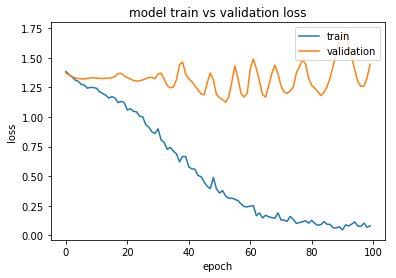

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc ='upper right')